# Experiment: Fit Psytrack Features

**Goal**: Using the multi class model and new train threshold dataset, fit a model with the same features as psytrack (bias, sa, sb, prev stim, prev correct, prev choice) and assess the sigmas and weights.

It will be helpful here to created weight plots similar to those of a binary model with R-L as well. Overall, this notebook is seen as a validation to make sure we can find similar results/weights as Athena and Nick.

Related notebooks:

* `2024_01_19_stg_4_stim_violation_intrxs.ipynb` for R-L weights

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment_sigma_sweep import ExperimentSigmaSweep
from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression
from multiglm.visualizations.model_visualizer import ModelVisualizer
from multiglm.features.design_matrix_generator import DesignMatrixGeneratorPsytrack
from multiglm.data import ANIMAL_IDS

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Model Configs

In [2]:
model_config = {
    "psytrack_features": {  # MODEL 1
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorPsytrack,
        "filter_implementation": None,  # no filter & column drop is done by dmg
    }
}

params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "null_mode": "multi",
    "eval_train": True,
    "tau_columns": None,
    "model_config": model_config,
    "min_training_stage": 4,
}

save_name = "2024_02_14_fit_psytrack_features.pkl"

## Run

In [3]:
experiment = ExperimentSigmaSweep(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']
minimum training stage is  4

 >>>> evaluating animal W051 <<<<

 ***** evaluating model psytrack_features w/ sigma 0.07 *****
         Current function value: 64995.381417
         Iterations: 24
         Function evaluations: 103
         Gradient evaluations: 91

 ***** evaluating model psytrack_features w/ sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 64759.621627
         Iterations: 25
         Function evaluations: 38
         Gradient evaluations: 38

 ***** evaluating model psytrack_features w/ sigma 0.25 *****
         Current function value: 64687.335386
         Iterations: 24
         Function evaluations: 103
         Gradient evaluations: 90

 ***** evaluating model psytrack_features w/ sigma 0.5 *****
         Current function val

In [4]:
experiment.save(save_name)

## Visualize

In [5]:
palette = "Set2"

mv = ModelVisualizer(experiment)

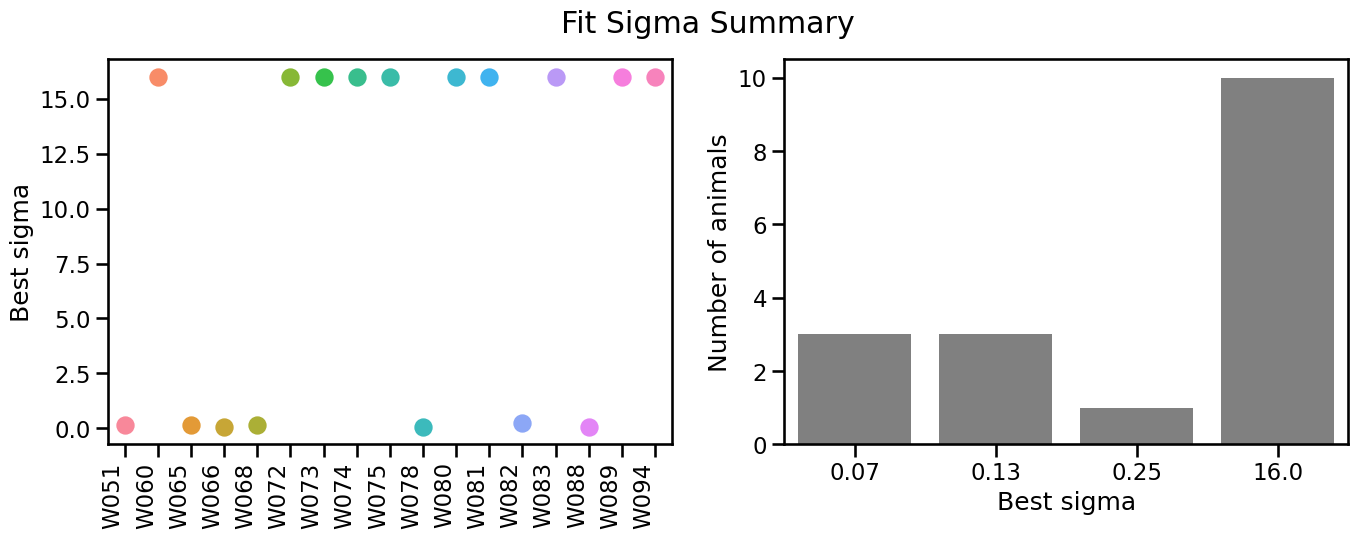

In [6]:
mv.plot_sigma_summary()

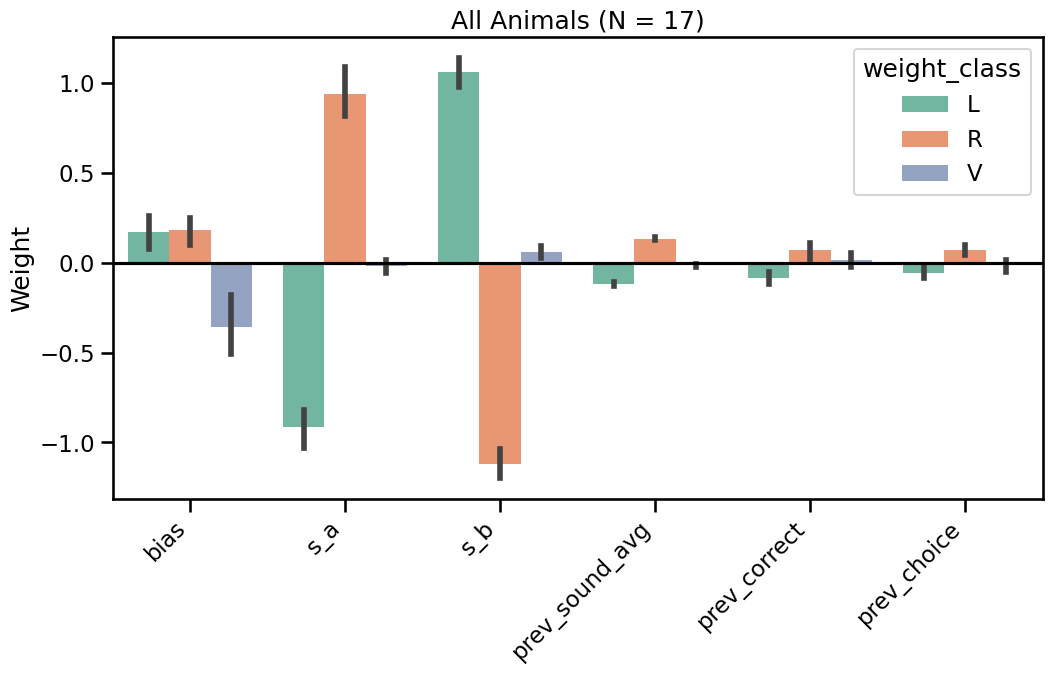

In [7]:
mv.plot_weights_summary(palette=palette)

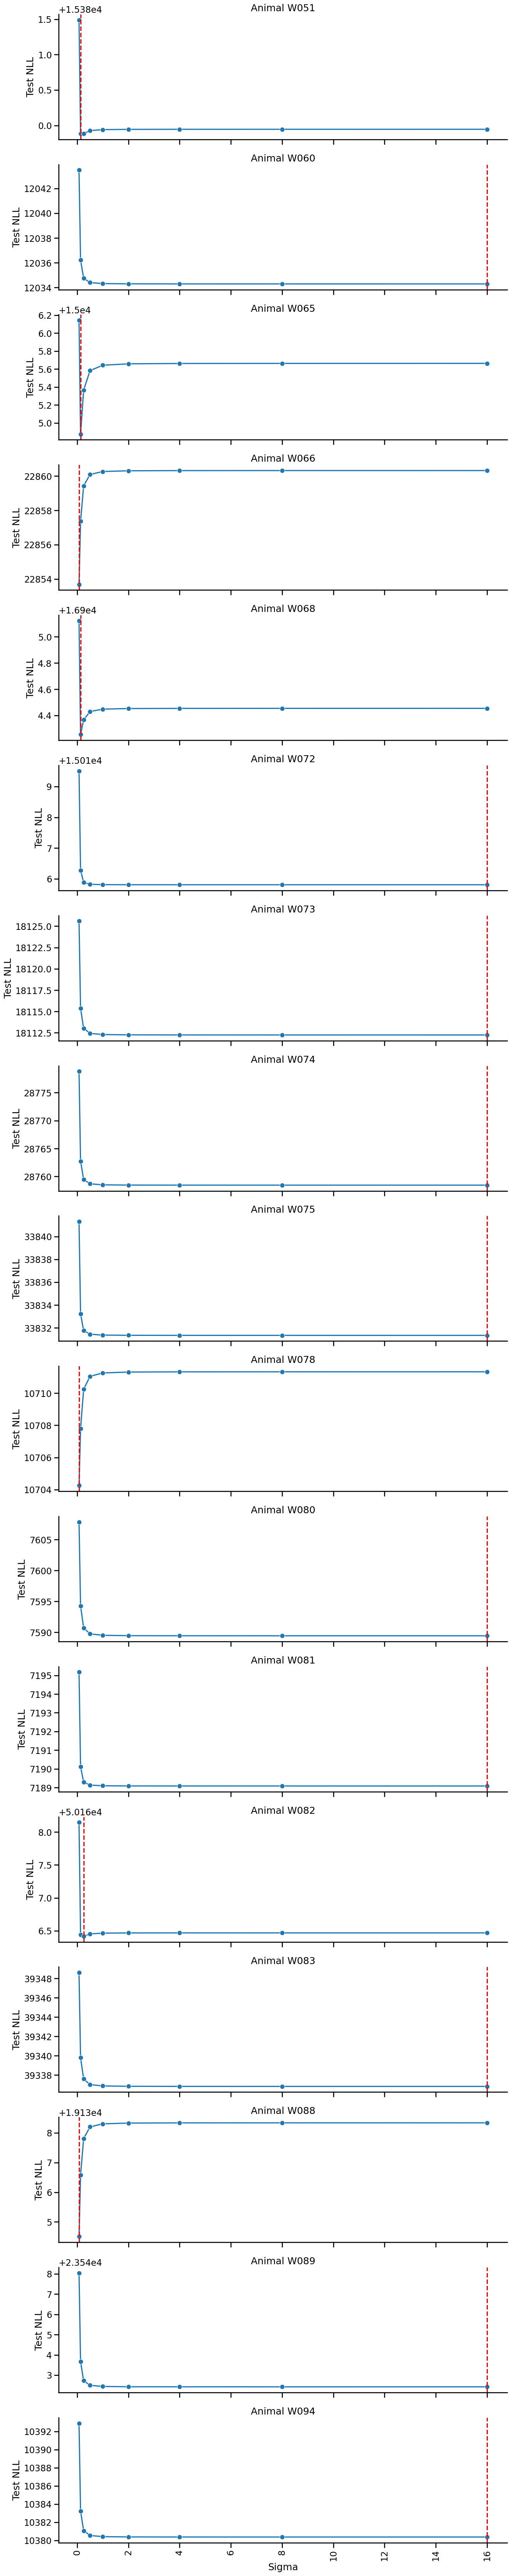

In [8]:
mv.plot_nll_over_sigmas_by_animal()

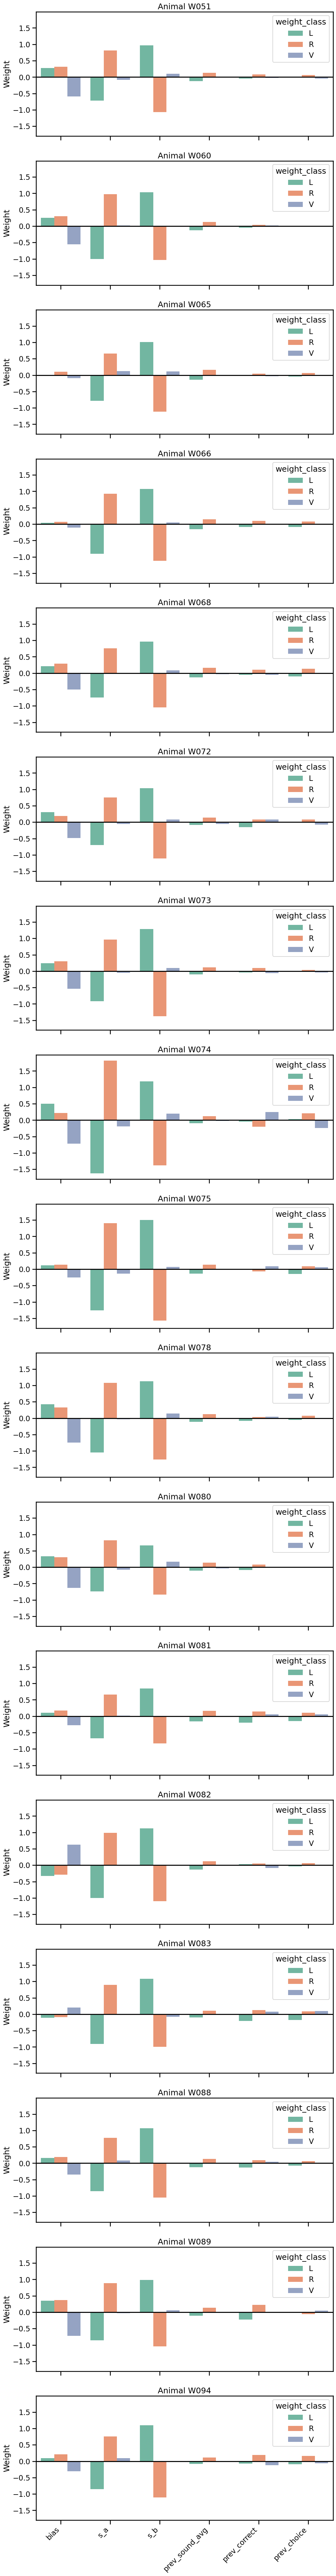

In [9]:
mv.plot_weights_by_animal(palette=palette)